# Exploratory Data Analysis on Titanic dataset

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [20]:
df=pd.read_csv("titanic_dataset.csv")

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [22]:
# features or preditors in the dataset 
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [23]:
df.shape

(418, 12)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [25]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

- Numerical columns - PassengerId,Survived,Pclass,Age,Sibsp,Parch,Ticket,Fare.

- Categorial Columns - Name,Sex,cabin,Embarked

In [26]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [27]:
# number of unique values in each columns
df.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

#### Handling Missing Values

The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.

There are many ways to handle missing values in the dataset:

- Deleting Rows with missing values
- Impute missing values for continuous variable
- Impute missing values for categorical variable
- Other Imputation Methods
- Using Algorithms that support missing values
- Prediction of missing values
- Imputation using Deep Learning Library — Datawig

In [28]:
# missing values
df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [29]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

- since this data contains 400 records and cabin has 327 missing values so it's better to drop this columns   

<AxesSubplot:>

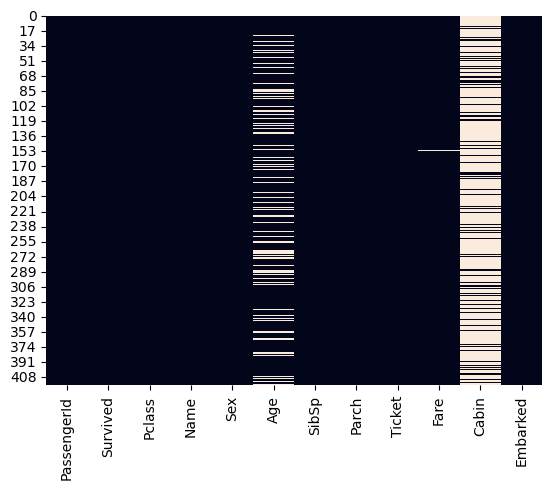

In [30]:
### Visualizing the missing values using heatmap 
sns.heatmap(df.isnull(),cbar=False)

### Insights
- 'Survived' is the target column/variable.
- 'PassengerId', 'Name' and 'Ticket' doesn't contribute to the target variable 'Survived'. So, we can remove it from the data.
- 'Age' and 'Embarked' has less number of missing value. We have to impute them using different techniques.
- As there are a lot of missing values in the column 'Cabin', we can remove it from the training data.
- As there are a lot of missing values in the column 'Cabin', we can remove it from the training data.
- We can also create new variable like 'total size of the family' from the columns 'SibSp' and 'Parch'.

In [31]:
# droping the cabin column since it contains very large number of missing values 
df.drop(['Cabin'],axis=1,inplace=True)

In [32]:
df.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

For Age columns , we can fill missing values with their mean or median value.

In [33]:
# filling missing values with its mean
df['Age']=df['Age'].fillna(df['Age'].mean())

In [34]:
### And, For fair column,simply remove the row with missing values as it contains only one missing values
df=df.dropna()

In [35]:
df.shape

(417, 11)

In [36]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Find the mean, median, mode, max, min, quantiles, outliers, standard deviation and variance of the data**

In [40]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


#### Mean

In [41]:
df.mean(numeric_only=True)

PassengerId    1100.635492
Survived          0.364508
Pclass            2.263789
Age              30.200103
SibSp             0.448441
Parch             0.393285
Fare             35.627188
dtype: float64

#### Median

In [43]:
df.median(numeric_only=True)

PassengerId    1101.00000
Survived          0.00000
Pclass            3.00000
Age              30.27259
SibSp             0.00000
Parch             0.00000
Fare             14.45420
dtype: float64

#### Mode

In [47]:
df.mode(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,892,0.0,3.0,30.27259,0.0,0.0,7.75
1,893,NaN,NaN,NaN,NaN,NaN,NaN
2,894,NaN,NaN,NaN,NaN,NaN,NaN
3,895,NaN,NaN,NaN,NaN,NaN,NaN
4,896,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
412,1305,NaN,NaN,NaN,NaN,NaN,NaN
413,1306,NaN,NaN,NaN,NaN,NaN,NaN
414,1307,NaN,NaN,NaN,NaN,NaN,NaN
415,1308,NaN,NaN,NaN,NaN,NaN,NaN


#### Variance

In [50]:
df.var(numeric_only=True)

PassengerId    14622.559122
Survived           0.232199
Pclass             0.709094
Age              157.813531
SibSp              0.805629
Parch              0.965147
Fare            3125.657074
dtype: float64

#### Standard Deviation

In [52]:
df.std(numeric_only=True)

PassengerId    120.923774
Survived         0.481870
Pclass           0.842077
Age             12.562386
SibSp            0.897568
Parch            0.982419
Fare            55.907576
dtype: float64

## Outlier Detection

- Outliers can be detected using visualization like using box plot and scatter plot, or using Inter-Quartile Range and z-sore(mathematial approach).

**1.Using Box plot**

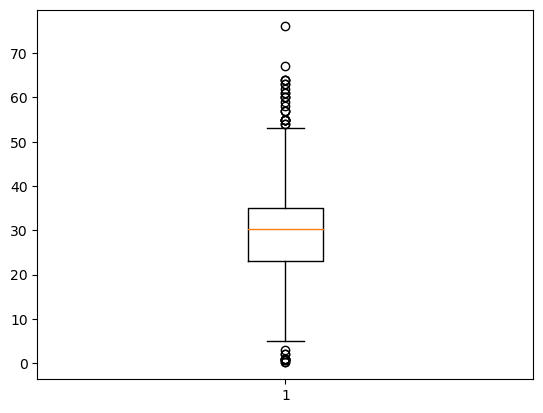

In [56]:
plt.boxplot(df['Age'])
plt.show()

- In the above graph, it's clearly visible that values above 60 are acting as Outliers.

**2.Using Scatter plot** 

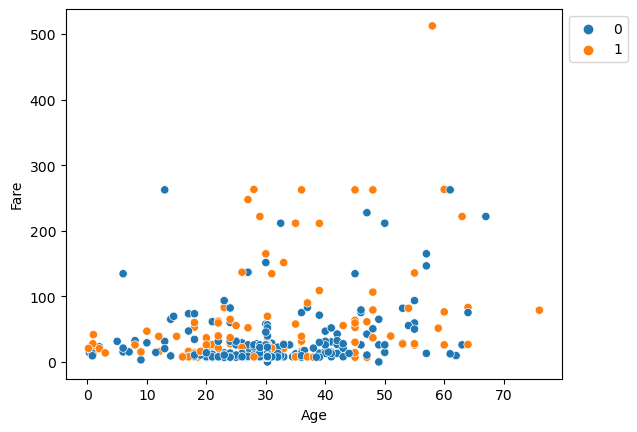

In [57]:
## scatter plot between Age and PassengerId columns
sns.scatterplot(x='Age', y='Fare',
                hue='Survived', data=df, )
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()

- By Looking at the graph we can summarize that most of the data points are in the bottom of the graph and the points that are up-right corners are acting as outliers. 

**3.Using Inter-quartile Range**

In [58]:
# IQR
Q1=np.percentile(df['Age'], 25, interpolation = 'midpoint')
Q3=np.percentile(df['Age'], 75, interpolation = 'midpoint')
IQR = Q3-Q1
IQR

12.0

In [59]:
# Above Upper bound
upper =(Q3+1.5*IQR)
 
print("Upper bound:",upper)
print(np.where(df['Age']>=upper))
 
# Below Lower bound
lower =(Q1-1.5*IQR)
print("Lower bound:",lower)
print(np.where(df['Age']<=lower))

Upper bound: 53.0
(array([  2,  13,  20,  48,  69,  77,  81,  96, 114, 131, 142, 176, 178,
       192, 212, 216, 223, 235, 239, 292, 304, 307, 313, 315, 342, 355,
       373, 377, 386], dtype=int64),)
Lower bound: 5.0
(array([ 89, 117, 200, 249, 262, 280, 283, 295, 306, 353, 378, 408],
      dtype=int64),)


- This points are acting as outliers.

**4.Z-score**

In [63]:
z = np.abs(stats.zscore(df['Age']))
print(z)

0      0.342695
1      1.338924
2      2.534399
3      0.255043
4      0.653535
         ...   
413    0.005777
414    0.701337
415    0.661488
416    0.005777
417    0.005777
Name: Age, Length: 417, dtype: float64


- To Define an outlier threshold value is hoosen whcih is generally 3. 

In [65]:
threshold=2.5
# Position of outlier
print(np.where(z>2.5))

(array([  2,  13,  81,  96, 114, 178, 235, 304], dtype=int64),)


- This points are acting as outliers.

## Data Visualization

**Visualization of 'Survived'[Target column]**

In [66]:
df.Survived.value_counts()

0    265
1    152
Name: Survived, dtype: int64

Text(0, 0.5, 'Passenger Count')

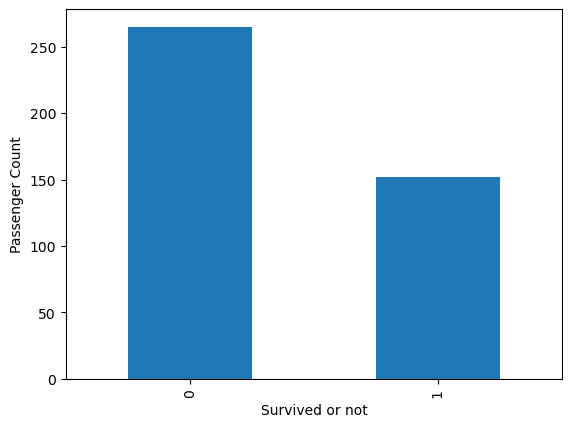

In [67]:
plt = df.Survived.value_counts().plot(kind='bar')
plt.set_xlabel('Survived or not')
plt.set_ylabel('Passenger Count')

<AxesSubplot:xlabel='Survived', ylabel='count'>

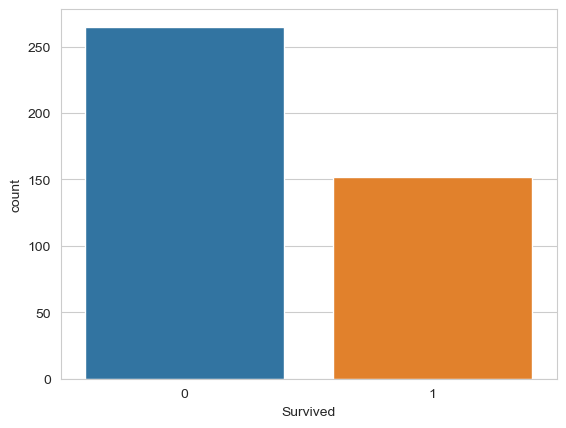

In [68]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

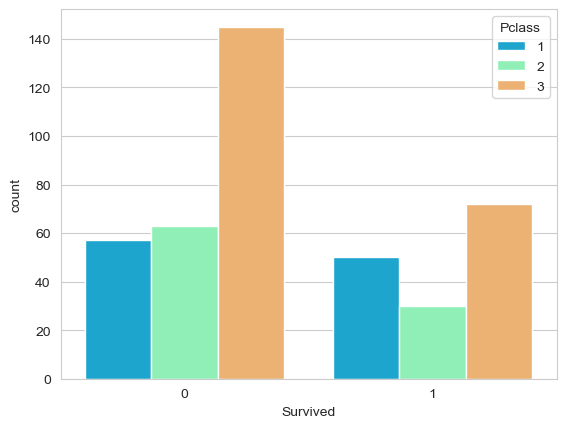

In [69]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')


**Plass**
- Majority of them are from 3rd class

Text(0, 0.5, 'Survival Probability')

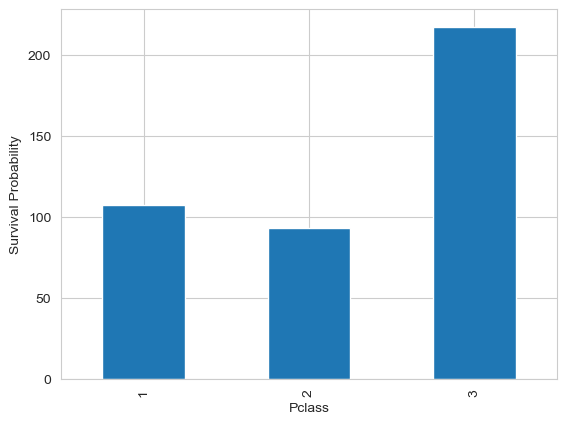

In [70]:
plt = df.Pclass.value_counts().sort_index().plot(kind='bar', title='')
plt.set_xlabel('Pclass')
plt.set_ylabel('Survival Probability')

In [71]:
df[['Pclass', 'Survived']].groupby('Pclass').count()

,Survived
Pclass,
1,107
2,93
3,217


In [72]:
df[['Pclass', 'Survived']].groupby('Pclass').sum()

,Survived
Pclass,
1,50
2,30
3,72


- Pclass survival probability

Text(0, 0.5, 'Survival Probability')

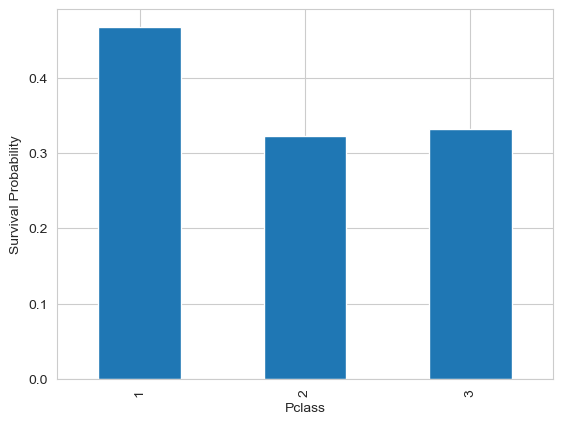

In [73]:
plt = df[['Pclass', 'Survived']].groupby('Pclass').mean().Survived.plot(kind='bar')
plt.set_xlabel('Pclass')
plt.set_ylabel('Survival Probability')

- From the above results, we can say that, 1st class has high chance of surviving than the other two classes.

**Sex**
- majority of them are male

Text(0, 0.5, 'Passenger count')

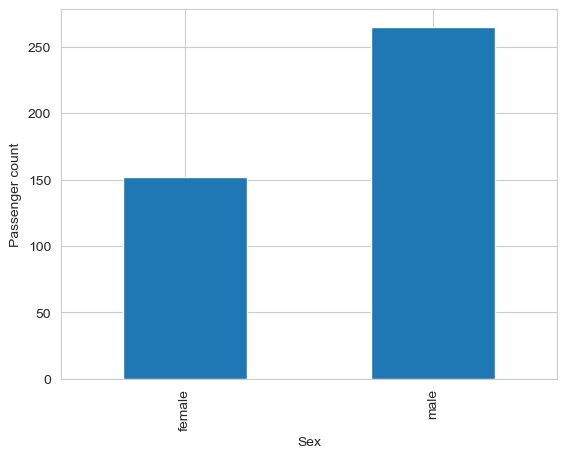

In [74]:
plt = df.Sex.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('Sex')
plt.set_ylabel('Passenger count')

*Sex Survival Probability*
- As we see, the survival probaility for Female is more. They might have given more priority to female than male.

Text(0, 0.5, 'Survival Probability')

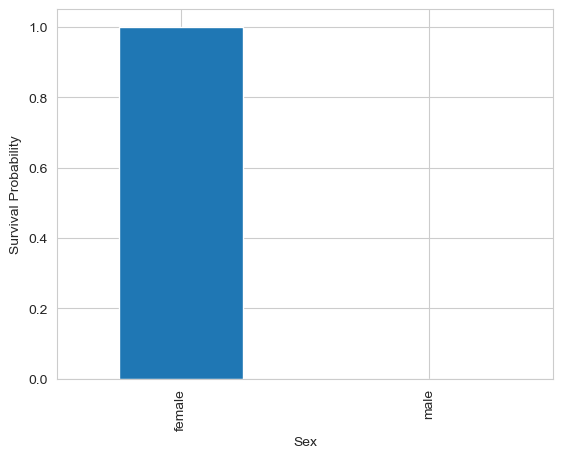

In [75]:
plt = df[['Sex', 'Survived']].groupby('Sex').mean().Survived.plot(kind='bar')
plt.set_xlabel('Sex')
plt.set_ylabel('Survival Probability')

**Embarked**
- Most of them are from Southampton(S).

Text(0, 0.5, 'Passenger count')

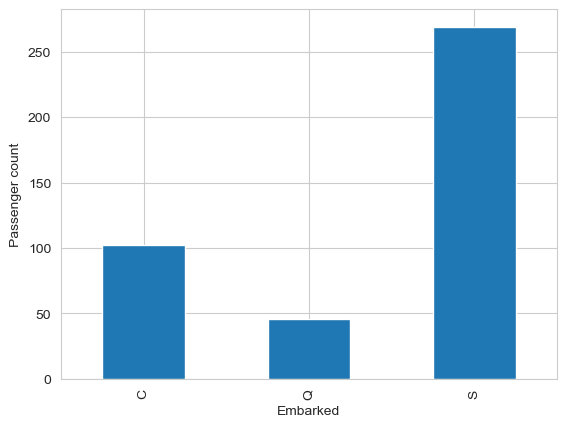

In [76]:
plt = df.Embarked.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('Embarked')
plt.set_ylabel('Passenger count')

**Embarked-Survival Probability**
- Survival probability: C > Q > S

Text(0, 0.5, 'Survival Probability')

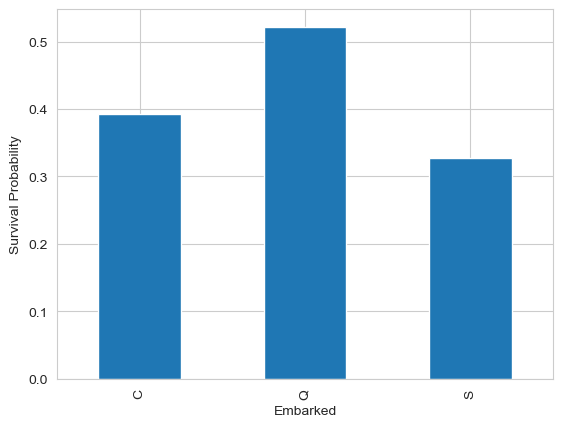

In [77]:
plt = df[['Embarked', 'Survived']].groupby('Embarked').mean().Survived.plot(kind='bar')
plt.set_xlabel('Embarked')
plt.set_ylabel('Survival Probability')

**Age**

<AxesSubplot:xlabel='Age'>

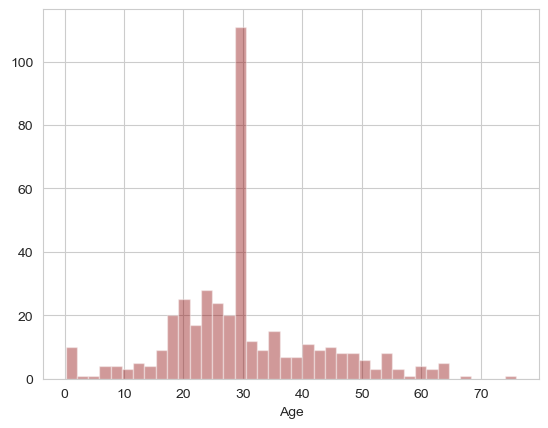

In [78]:
sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot:>

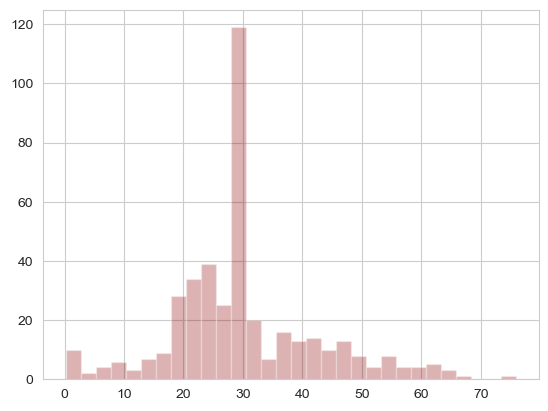

In [79]:
df['Age'].hist(bins=30,color='darkred',alpha=0.3)

**SibSp - Siblings/Spouse**

<AxesSubplot:xlabel='SibSp', ylabel='count'>

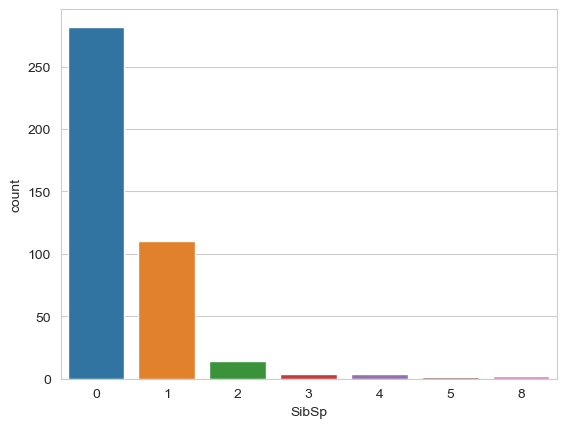

In [80]:
sns.countplot(x='SibSp',data=df)

**Fare**

<AxesSubplot:>

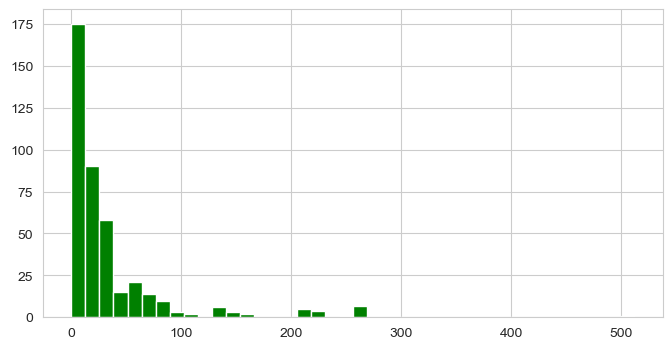

In [81]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4),label='Fare')

## Correlation

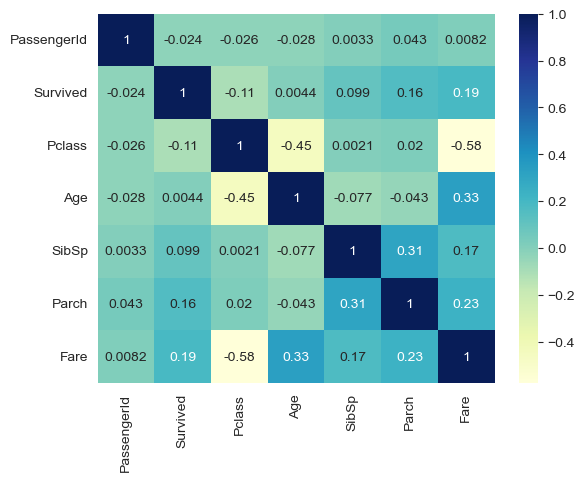

In [82]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)